
# **📦 Analizar el rendimiento de un E-commerce**

Authora:
- Lita Hume



Se realizo un análisis costo-eficiencia por local de venta y se brindo recomendaciones estrátegicas

# **1. Cargar y leer conjunto de datos**



In [1]:
# Importar bibliotecas

import pandas as pd
import numpy as np                     #Para cálculos matemáticos
import seaborn as sns                  #Para visualización de datos
import matplotlib.pyplot as plt        #Para trazar gráficos
from matplotlib import rcParams
%matplotlib inline
import warnings
#Para ignorar advertencias
warnings.filterwarnings("ignore")


In [2]:
df_completo = pd.read_csv('/content/tienda.csv', encoding = 'utf-8' , delimiter=';')

# **2. Estadística Descriptiva**

## Type Data
---



In [3]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Producto            9435 non-null   object 
 1   Categoria_producto  9435 non-null   object 
 2   Precio              9435 non-null   int64  
 3   Costo_envio         9435 non-null   int64  
 4   Fecha_compra        9435 non-null   object 
 5   Vendedor            9435 non-null   object 
 6   Lugar_compra        9435 non-null   object 
 7   Calificacion        9435 non-null   int64  
 8   Metodo_pago         9435 non-null   object 
 9   Cantidad_cuotas     9435 non-null   int64  
 10  lat                 9435 non-null   float64
 11  lon                 9435 non-null   float64
 12  tienda              9435 non-null   object 
dtypes: float64(2), int64(4), object(7)
memory usage: 958.4+ KB


In [13]:
df_completo['Fecha_compra'] = pd.to_datetime(df_completo['Fecha_compra'], errors='coerce')
print(df_completo['Fecha_compra'].dtype)

datetime64[ns]


In [5]:
df_completo.head()

,Producto,Categoria_producto,Precio,Costo_envio,Fecha_compra,Vendedor,Lugar_compra,Calificacion,Metodo_pago,Cantidad_cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300,6900,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300,8400,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600,15900,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500,41000,3/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200,20200,7/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


## Missing Value
---

In [7]:
data_null = (df_completo.isna().sum()/len(df_completo)).sort_values(ascending=False)
pd.set_option('display.max_rows', None)
data_null

,0
Producto,0.0
Categoria_producto,0.0
Precio,0.0
Costo_envio,0.0
Fecha_compra,0.0
Vendedor,0.0
Lugar_compra,0.0
Calificacion,0.0
Metodo_pago,0.0
Cantidad_cuotas,0.0


In [8]:
df_completo.isna().sum().sum()

np.int64(0)

## Duplicate value

---



In [9]:
df_completo.duplicated().sum()

np.int64(0)

## Target Feature Description
---



🔎 **Características Númericas**

In [10]:
for col in df_completo.columns:
    if df_completo[col].dtypes != 'object':
        print("{} : {} unique val".format(col, df_completo[col].nunique()))
        print("sample values: {}".format(df_completo[col].unique()[:5]))
        print('-'*100)

Precio : 5483 unique val
sample values: [164300 192300 209600 757500 335200]
----------------------------------------------------------------------------------------------------
Costo_envio : 1204 unique val
sample values: [ 6900  8400 15900 41000 20200]
----------------------------------------------------------------------------------------------------
Calificacion : 5 unique val
sample values: [4 1 5 3 2]
----------------------------------------------------------------------------------------------------
Cantidad_cuotas : 19 unique val
sample values: [ 8  4  1 10  5]
----------------------------------------------------------------------------------------------------
lat : 19 unique val
sample values: [ 4.60971  6.25184 10.39972  3.43722 11.24079]
----------------------------------------------------------------------------------------------------
lon : 19 unique val
sample values: [-74.08175 -75.56359 -75.51444 -76.5225  -74.19904]
-----------------------------------------------------

## Statistical summary
---



In [15]:
df_completo[['Precio','Costo_envio','Calificacion','Cantidad_cuotas']].describe()

,Precio,Costo_envio,Calificacion,Cantidad_cuotas
count,9.435000e+03,9435.000000,9435.000000,9435.000000
mean,4.667323e+05,24875.145734,4.014520,2.927398
std,5.903207e+05,31480.036346,1.390518,2.802776
min,7.600000e+03,0.000000,1.000000,1.000000
25%,5.520000e+04,3000.000000,3.000000,1.000000
50%,2.215000e+05,11700.000000,5.000000,1.000000
75%,6.633000e+05,34900.000000,5.000000,4.000000
max,2.977000e+06,162500.000000,5.000000,24.000000


🔎 **Características Categóricas**

In [16]:
for col in df_completo.columns:
    if df_completo[col].dtypes == 'object':
        print("{} : {} unique val".format(col, df_completo[col].nunique()))
        print("sample values: {}".format(df_completo[col].unique()))
        print('-'*100)

Producto : 51 unique val
sample values: ['Asistente virtual' 'Mesa de comedor' 'Juego de mesa' 'Microondas'
 'Silla de oficina' 'Bloques de construcción' 'Muñeca bebé' 'Lavavajillas'
 'Lavadora de ropa' 'Carrito de control remoto' 'Refrigerador'
 'Auriculares' 'Olla de presión' 'Bicicleta' 'Ciencia de datos con Python'
 'Balón de voleibol' 'Ajedrez de madera' 'TV LED UHD 4K' 'Vaso térmico'
 'Kit de bancas' 'Dashboards con Power BI' 'Cubertería' 'Set de ollas'
 'Batería' 'Cuerda para saltar' 'Estufa' 'Cama box' 'Impresora'
 'Mesa de noche' 'Armario' 'Dinosaurio Rex' 'Guitarra eléctrica'
 'Secadora de ropa' 'Sofá reclinable' 'Tablet ABXY' 'Cubo mágico 8x8'
 'Set de vasos' 'Modelado predictivo' 'Iphone 15' 'Mochila'
 'Balón de baloncesto' 'Auriculares con micrófono' 'Sillón'
 'Guitarra acústica' 'Iniciando en programación' 'Celular ABXY'
 'Smartwatch' 'Mesa de centro' 'Cama king' 'Smart TV' 'Pandereta']
--------------------------------------------------------------------------------------

In [17]:
df_completo['tienda'].value_counts()

,count
tienda,
Tienda 1,2359
Tienda 2,2359
Tienda 3,2359
Tienda 4,2358


In [19]:
df_completo['Metodo_pago'].value_counts()

,count
Metodo_pago,
Tarjeta de crédito,6898
Nequi,1900
Cupón,504
Tarjeta de débito,133


## Atypical values

---



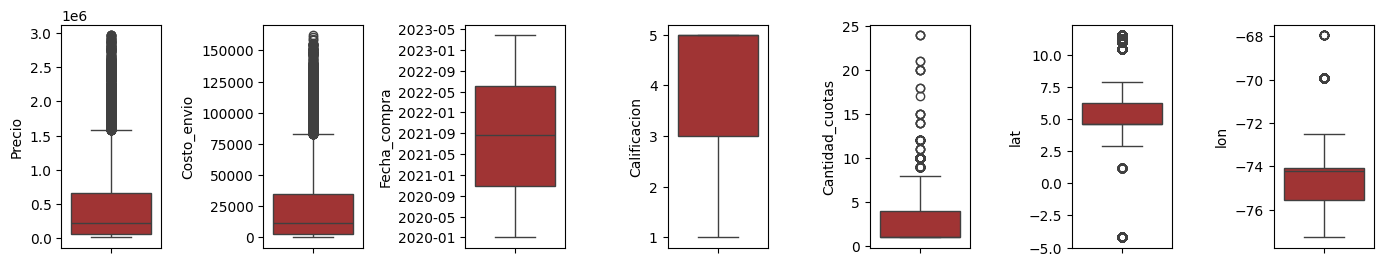

In [20]:
num = df_completo.loc[:, (df_completo.dtypes != 'object')].columns.tolist()

plt.figure(figsize=(20, 15))
for i in range(0, len(num)):
    plt.subplot(6, 10, i+1)
    sns.boxplot(df_completo, y=df_completo[num[i]], orient='v', color='firebrick')
    plt.tight_layout()

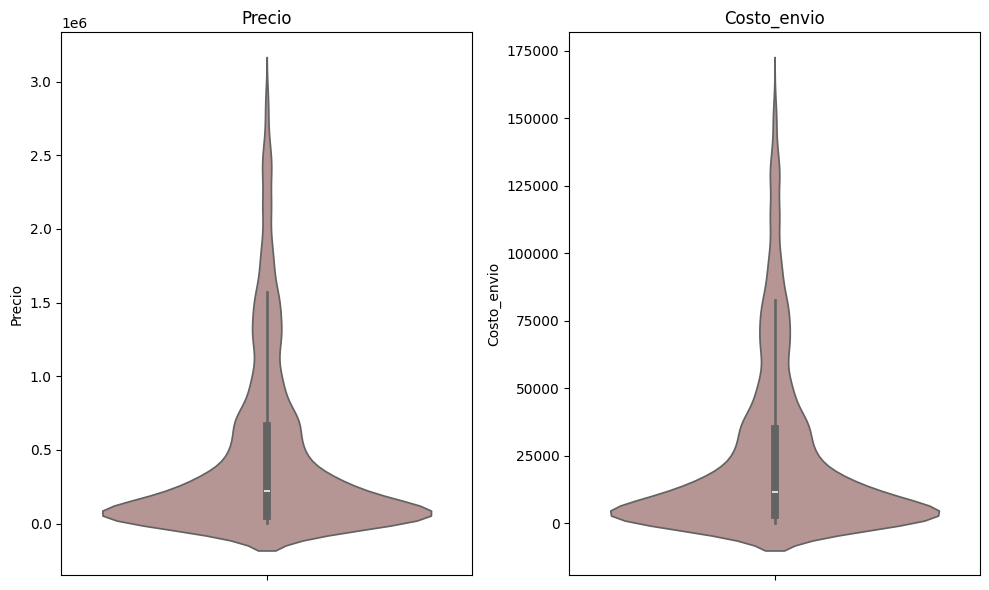

In [22]:
# Lista de columnas a gráficar
columnas = ['Precio', 'Costo_envio']

# Crear figura
plt.figure(figsize=(10, 6))

# Graficar cada columna
for i, col in enumerate(columnas):
    plt.subplot(1, 2, i+1)  # 1 fila, 2 columnas
    sns.violinplot(y=df_completo[col], orient='v', color='rosybrown')
    plt.title(col)

plt.tight_layout()
plt.show()


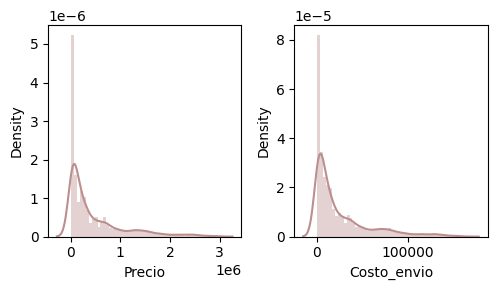

In [23]:
feats = ['Precio', 'Costo_envio']

plt.figure(figsize=(10, 3))
for i in range(0, len(feats)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df_completo[feats[i]], color='rosybrown')
    plt.tight_layout()

In [25]:
# Crear copia del dataset original para análisis sin valores extremos
df_filtrado = df_completo.copy()

# Definir límites usando percentiles (método robusto)
Q1_precio = df_completo['Precio'].quantile(0.25)
Q3_precio = df_completo['Precio'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio
limite_superior_precio = Q3_precio + 1.5 * IQR_precio

Q1_envio = df_completo['Costo_envio'].quantile(0.25)
Q3_envio = df_completo['Costo_envio'].quantile(0.75)
IQR_envio = Q3_envio - Q1_envio
limite_superior_envio = Q3_envio + 1.5 * IQR_envio

print(f"Límite superior Precio: {limite_superior_precio:,.0f} COP")
print(f"Límite superior Costo_envio: {limite_superior_envio:,.0f} COP")

# Filtrar dataset
df_filtrado = df_completo[
    (df_completo['Precio'] <= limite_superior_precio) &
    (df_completo['Costo_envio'] <= limite_superior_envio)
]

print(f"Dataset original: {len(df_completo)} registros")
print(f"Dataset filtrado: {len(df_filtrado)} registros")
print(f"Registros eliminados: {len(df_completo) - len(df_filtrado)} ({((len(df_completo) - len(df_filtrado))/len(df_completo))*100:.1f}%)")

Límite superior Precio: 1,575,450 COP
Límite superior Costo_envio: 82,750 COP
Dataset original: 9435 registros
Dataset filtrado: 8753 registros
Registros eliminados: 682 (7.2%)


In [26]:
df_filtrado.to_csv('df_filtrado.csv', index=False)

In [29]:
# Crear categorías de precio
bins_precio = [0, 100000, 500000, 1000000, 3000000]
labels_precio = ['Económico', 'Medio', 'Alto', 'Premium']
df_completo['Segmento_Precio'] = pd.cut(df_completo['Precio'], bins=bins_precio, labels=labels_precio)

# Analizar por segmentos
analisis_segmentos = df_completo.groupby('Segmento_Precio').agg({
    'Precio': ['count', 'mean', 'std'],
    'Costo_envio': ['mean', 'std'],
    'Calificacion': 'mean'
}).round(0)

# **3. Investigación Empresarial**

## 1. Análisis de facturación

---





In [30]:
# Calcular facturación total por tienda
facturacion_por_tienda = df_filtrado.groupby('tienda')['Precio'].sum()
print("Facturación total por tienda:")
print(facturacion_por_tienda)

# Facturación promedio por venta
facturacion_promedio = df_filtrado.groupby('tienda')['Precio'].mean()
print("\nFacturación promedio por venta:")
print(facturacion_promedio)

Facturación total por tienda:
tienda
Tienda 1    755685100
Tienda 2    748131300
Tienda 3    775590500
Tienda 4    717851900
Name: Precio, dtype: int64

Facturación promedio por venta:
tienda
Tienda 1    347921.316759
Tienda 2    343336.989445
Tienda 3    352061.053109
Tienda 4    326444.702137
Name: Precio, dtype: float64


## 2. Ventas por categoría

---



In [32]:
# Ventas por categoría en todas las tiendas
ventas_por_categoria = df_filtrado.groupby('Categoria_producto').size().sort_values(ascending=False)
print("Ventas por categoría:")
print(ventas_por_categoria)

# Ventas por categoría por tienda
ventas_categoria_tienda = df_filtrado.groupby(['tienda', 'Categoria_producto']).size().unstack(fill_value=0)
print("\nVentas por categoría por tienda:")
print(ventas_categoria_tienda)

Ventas por categoría:
Categoria_producto
Muebles                    1886
Juguetes                   1290
Electrónicos               1289
Deportes y diversión       1113
Electrodomésticos           950
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
dtype: int64

Ventas por categoría por tienda:
Categoria_producto  Artículos para el hogar  Deportes y diversión  \
tienda                                                              
Tienda 1                                171                   284   
Tienda 2                                181                   275   
Tienda 3                                177                   277   
Tienda 4                                201                   277   

Categoria_producto  Electrodomésticos  Electrónicos  Instrumentos musicales  \
tienda                                                                        
Tienda 1                          254           319                     182   
Tien

## 3. Calificación promedio de la tienda

---




In [34]:
calificacion_promedio = df_filtrado.groupby('tienda')['Calificacion'].mean()
print("Calificación promedio por tienda:")
print(calificacion_promedio.round(2))

Calificación promedio por tienda:
tienda
Tienda 1    3.97
Tienda 2    4.03
Tienda 3    4.05
Tienda 4    3.99
Name: Calificacion, dtype: float64


## 4. Productos más y menos vendidos

---



In [35]:
# Productos más vendidos (top 10)
productos_mas_vendidos = df_filtrado['Producto'].value_counts().head(10)
print("Productos más vendidos:")
print(productos_mas_vendidos)

# Productos menos vendidos (últimos 10)
productos_menos_vendidos = df_filtrado['Producto'].value_counts().tail(10)
print("\nProductos menos vendidos:")
print(productos_menos_vendidos)

# Por tienda
for tienda in df_completo['tienda'].unique():
    print(f"\nTienda {tienda}:")
    print("Top 5 productos:")
    print(df_completo[df_completo['tienda'] == tienda]['Producto'].value_counts().head(5))

Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Set de ollas                 200
Modelado predictivo          200
Cama box                     199
Bloques de construcción      199
Secadora de ropa             198
Name: count, dtype: int64

Productos menos vendidos:
Producto
Guitarra eléctrica           165
Lavadora de ropa             163
Mochila                      163
Auriculares con micrófono    158
Celular ABXY                 157
Tablet ABXY                  137
Smart TV                     107
Iphone 15                     27
Refrigerador                  17
TV LED UHD 4K                  2
Name: count, dtype: int64

Tienda Tienda 1:
Top 5 productos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda Tienda 2:
Top 5 productos:

## 5. Envío promedio por tienda

---



In [37]:
Costo_envio_promedio = df_filtrado.groupby('tienda')['Costo_envio'].mean()
print("Costo promedio_envio por tienda:")
print(Costo_envio_promedio.round(2))

# Relación co_envio vs precio
relacion_envio_precio = (df_filtrado.groupby('tienda')['Costo_envio'].mean() /
                        df_filtrado.groupby('tienda')['Precio'].mean()) * 100
print("\nPorcentaje de costo_envio sobre precio promedio:")
print(relacion_envio_precio.round(2))

Costo promedio_envio por tienda:
tienda
Tienda 1    18526.84
Tienda 2    18303.40
Tienda 3    18768.36
Tienda 4    17392.86
Name: Costo_envio, dtype: float64

Porcentaje de costo_envio sobre precio promedio:
tienda
Tienda 1    5.33
Tienda 2    5.33
Tienda 3    5.33
Tienda 4    5.33
dtype: float64


# **4. Conclusiones**

In [38]:
# Análisis comparativo filtrado
print("=== ANÁLISIS COMPARATIVO COMPLETO ===")

# Crear dataframe resumen
resumen_tiendas = pd.DataFrame({
    'Facturación Total': facturacion_por_tienda,
    'Facturación Promedio': facturacion_promedio,
    'Calificación Promedio': calificacion_promedio,
    'Costo Envío Promedio': Costo_envio_promedio,
    'Porcentaje Envío/Precio': relacion_envio_precio,
    'Total Ventas': df_filtrado.groupby('tienda').size()
})

print(resumen_tiendas.round(2))

# Eficiencia (facturación por costo de envío)
resumen_tiendas['Eficiencia'] = resumen_tiendas['Facturación Total'] / resumen_tiendas['Costo Envío Promedio']
print("\nEficiencia (Facturación/Costo de envío):")
print(resumen_tiendas['Eficiencia'].round(2))

=== ANÁLISIS COMPARATIVO COMPLETO ===
          Facturación Total  Facturación Promedio  Calificación Promedio  \
tienda                                                                     
Tienda 1          755685100             347921.32                   3.97   
Tienda 2          748131300             343336.99                   4.03   
Tienda 3          775590500             352061.05                   4.05   
Tienda 4          717851900             326444.70                   3.99   

          Costo Envío Promedio  Porcentaje Envío/Precio  Total Ventas  
tienda                                                                 
Tienda 1              18526.84                     5.33          2172  
Tienda 2              18303.40                     5.33          2179  
Tienda 3              18768.36                     5.33          2203  
Tienda 4              17392.86                     5.33          2199  

Eficiencia (Facturación/Costo de envío):
tienda
Tienda 1    40788.66
Tie

### Visualización

---



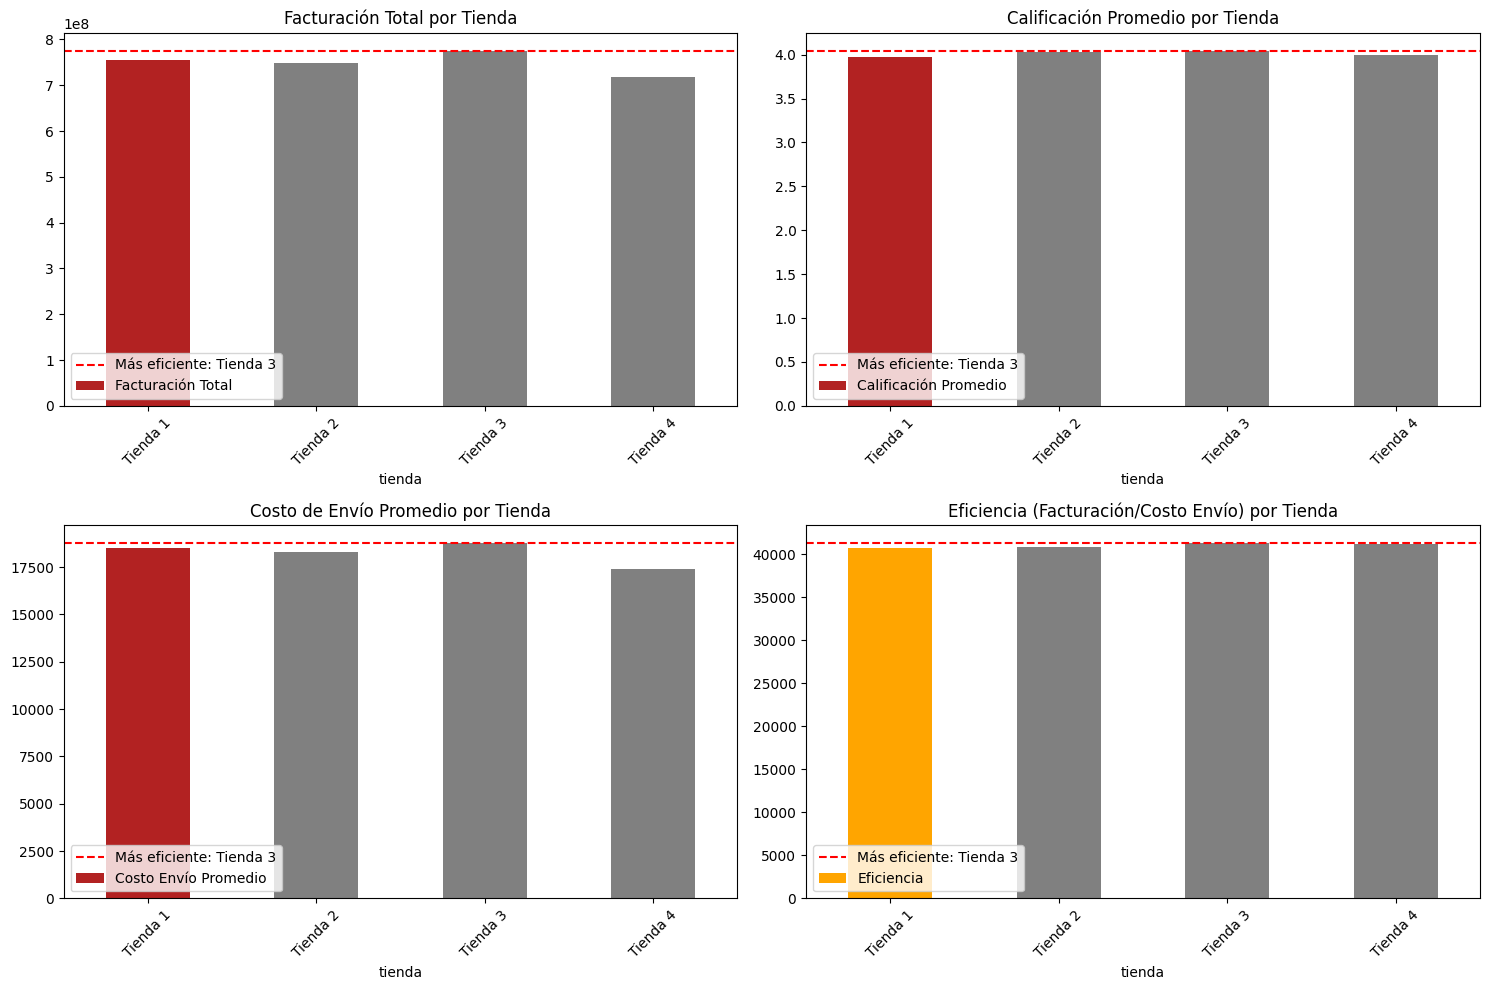

In [39]:
# Gráficos comparativos
plt.figure(figsize=(15, 10))

# Get the name of the most efficient store
mejor_tienda = resumen_tiendas['Eficiencia'].idxmax()

# Define colors: highlight Tienda 1, grey for others
colors = ['firebrick' if tienda == 'Tienda 1' else 'grey' for tienda in resumen_tiendas.index]
colors_efficiency = ['orange' if tienda == 'Tienda 1' else 'grey' for tienda in resumen_tiendas.index]


plt.subplot(2, 2, 1)
resumen_tiendas['Facturación Total'].plot(kind='bar', color=colors)
plt.title('Facturación Total por Tienda')
plt.xticks(rotation=45)
# Add a horizontal line for the most efficient store's total billing
plt.axhline(y=resumen_tiendas.loc[mejor_tienda, 'Facturación Total'], color='r', linestyle='--', label=f'Más eficiente: {mejor_tienda}')
plt.legend()


plt.subplot(2, 2, 2)
resumen_tiendas['Calificación Promedio'].plot(kind='bar', color=colors)
plt.title('Calificación Promedio por Tienda')
plt.xticks(rotation=45)
# Add a horizontal line for the most efficient store's average rating
plt.axhline(y=resumen_tiendas.loc[mejor_tienda, 'Calificación Promedio'], color='r', linestyle='--', label=f'Más eficiente: {mejor_tienda}')
plt.legend()

plt.subplot(2, 2, 3)
resumen_tiendas['Costo Envío Promedio'].plot(kind='bar', color=colors)
plt.title('Costo de Envío Promedio por Tienda')
plt.xticks(rotation=45)
# Add a horizontal line for the most efficient store's average shipping cost
plt.axhline(y=resumen_tiendas.loc[mejor_tienda, 'Costo Envío Promedio'], color='r', linestyle='--', label=f'Más eficiente: {mejor_tienda}')
plt.legend()


plt.subplot(2, 2, 4)
resumen_tiendas['Eficiencia'].plot(kind='bar', color=colors_efficiency)
plt.title('Eficiencia (Facturación/Costo Envío) por Tienda')
plt.xticks(rotation=45)
# Add a horizontal line for the most efficient store's efficiency
plt.axhline(y=resumen_tiendas.loc[mejor_tienda, 'Eficiencia'], color='r', linestyle='--', label=f'Más eficiente: {mejor_tienda}')
plt.legend()


plt.tight_layout()
plt.show()

### Comentario final

---

<br>

El análisis muestra claramente que la tienda 1 tiene la peor eficiencia operativa(basado en relación a su facturación y costo de envío), junto a otros indicadores clave de desempeño. Por tanto **la tienda 1** es la recomendada para vender.

### Recomendación de tienda a vender

In [40]:
# Identificar la tienda menos eficiente
tienda_menos_eficiente = resumen_tiendas['Eficiencia'].idxmin()
print(f"\nLa tienda menos eficiente es: {tienda_menos_eficiente}")

# Razones para la recomendación
print("\nRazones para recomendar la venta de esta tienda:")
print(f"1. Eficiencia más baja: {resumen_tiendas.loc[tienda_menos_eficiente, 'Eficiencia']:.2f}")
print(f"2. Costo de envío más alto: ${resumen_tiendas.loc[tienda_menos_eficiente, 'Costo Envío Promedio']:.2f}")
print(f"3. Porcentaje envío/precio: {resumen_tiendas.loc[tienda_menos_eficiente, 'Porcentaje Envío/Precio']:.2f}%")

# Comparativa con la mejor tienda
mejor_tienda = resumen_tiendas['Eficiencia'].idxmax()
print(f"\nComparativa con la mejor tienda ({mejor_tienda}):")
print(f"Diferencia en eficiencia: {resumen_tiendas.loc[mejor_tienda, 'Eficiencia'] - resumen_tiendas.loc[tienda_menos_eficiente, 'Eficiencia']:.2f}")


La tienda menos eficiente es: Tienda 1

Razones para recomendar la venta de esta tienda:
1. Eficiencia más baja: 40788.66
2. Costo de envío más alto: $18526.84
3. Porcentaje envío/precio: 5.33%

Comparativa con la mejor tienda (Tienda 3):
Diferencia en eficiencia: 535.70
